# Effective BH Curve
https://www.comsol.com/model/download/890501/applications.effective_nonlinear_magnetic_curves.pdf

In [19]:
using LinearAlgebra
using Interpolations, FastGaussQuadrature

using Plots

In [79]:
N = 100;
Bmax = 3;
B = collect(0:Bmax/N:Bmax);

# BH Curve

In [86]:
a = 1 / 50000;
b = 20;
c = 1e14;

mu0 = 4e-7 * pi';

mu_r = 1 ./ (a .+ (1 - a) * B.^(2*b) ./ (B.^(2*b) .+ c));
H    = B ./ (mu0 * mu_r);

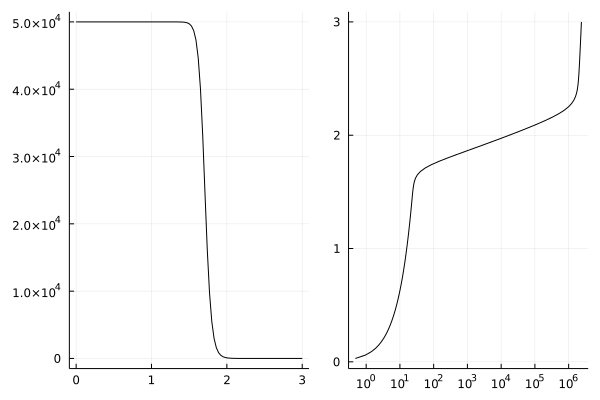

In [87]:
p1 = plot(B, mu_r, color = :black, legend = :false)
p2 = plot(H[2:end], B[2:end], color = :black, xaxis = :log, legend = :false)

plot(p1, p2)

# Simple Energy Method

In [88]:
BH = LinearInterpolation(H, B);
f(x) = BH(x)
x, w = gausslegendre(10);

H_ = H;
Bse  = zeros(size(H_));

for (i, Hel) = enumerate(H_)
    xL = 0; xR = Hel;
    g(x) = (xR - xL) / 2 * x + (xL + xR) / 2;
    int = (xR - xL) / 2 * dot(w, f.(g.(x)))
    
    Bse[i] = 2 / Hel * int;
end

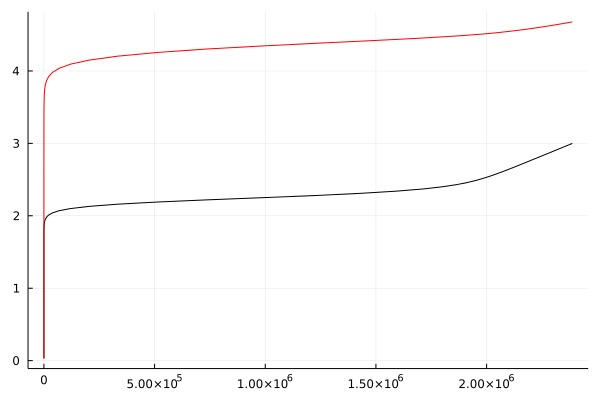

In [89]:
plot(H[2:end], B[2:end], color = :black, legend = :false)
plot!(H_[2:end], Bse[2:end], color = :red)